<a href="https://colab.research.google.com/github/Singhsansar/Diabetes-Diagnosis-using-Bayesian-Network/blob/main/Maths_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Data Preprocessing**

In [2]:
data = pd.read_csv('diabetes_prediction.csv')
# data = data.iloc[:1000]

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.shape

(100000, 9)

In [5]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<ipython-input-8-3ed6078139ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


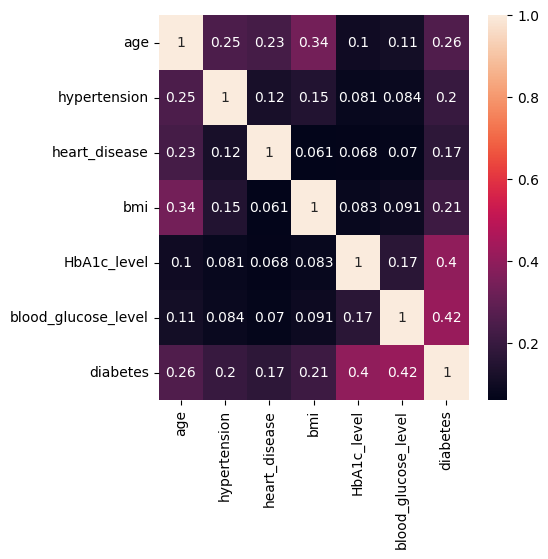

In [8]:
plt.figure(figsize=(5,5))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

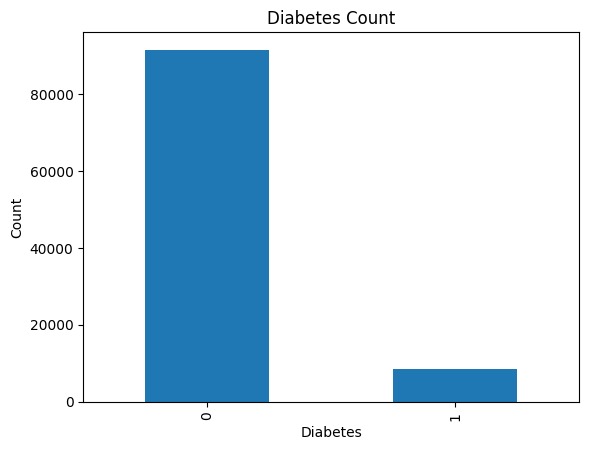

In [9]:
data['diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Count')
plt.show()

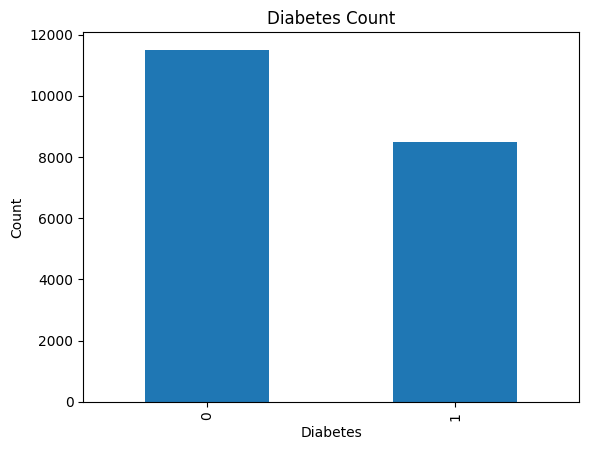

In [10]:
# since there is high imbalance in the dataset , so we removed 90000 data from the dataset of class 0 to make it more balanced
data.drop(data[data['diabetes'] == 0].sample(80000).index, inplace=True)
data['diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Count')
plt.show()


In [11]:
# sns.pairplot(data)
# plt.show()


In [12]:
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'])
data_encoded.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
6,44.0,0,0,19.31,6.5,200,1,1,0,0,0,0,0,0,1,0
7,79.0,0,0,23.86,5.7,85,0,1,0,0,1,0,0,0,0,0
25,30.0,0,0,33.76,6.1,126,0,0,1,0,0,0,0,0,1,0
26,67.0,0,1,27.32,6.5,200,1,0,1,0,0,0,0,0,0,1


### **spliting the data into train test and split**

In [13]:
data_encoded.shape

(20000, 16)

In [14]:
from sklearn.model_selection import train_test_split
features = data_encoded.drop('diabetes', axis=1)
label = data_encoded['diabetes']
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.20, random_state=42)

In [31]:
data_train = pd.concat([features_train, label_train], axis=1)
data_test = pd.concat([features_test, label_test], axis=1)
data_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
52679,28.0,0,0,31.44,8.2,155,1,0,0,0,0,0,0,1,0,1
9896,80.0,0,0,30.28,6.1,145,0,1,0,0,0,0,0,0,1,1
42653,29.0,0,0,31.26,4.8,85,1,0,0,1,0,0,0,0,0,0
5334,9.0,0,0,27.32,5.7,130,1,0,0,1,0,0,0,0,0,0
68991,52.0,0,0,30.84,6.0,200,1,0,0,0,1,0,0,0,0,1


## **Model Building and training**

In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

class BayesianNetwork:
    def __init__(self, structure):
        self.structure = structure
        self.variables = set([var for edge in structure for var in edge])
        self.cpds = {var: None for var in self.variables}

    def train(self, data):
        for variable in self.variables:
            parents = [edge[0] for edge in self.structure if edge[1] == variable]
            if parents:
                parent_data = data[parents]
                child_data = data[variable]
                cpd = self.calculate_conditional_probability(parent_data, child_data)
                self.cpds[variable] = cpd
            else:
                # Handle root nodes with adaptive smoothing
                value_counts = data[variable].value_counts()
                num_unique = len(value_counts)
                probabilities = value_counts / data.shape[0]
                smoothing = min(probabilities.min(), 0.01)  # Adjust smoothing factor
                self.cpds[variable] = {(): {value: probability + smoothing for value, probability in probabilities.items()}}

    def calculate_conditional_probability(self, parent_data, child_data):
        data = pd.concat([parent_data, child_data], axis=1)
        data.columns = list(parent_data.columns) + ['child']
        counts = data.groupby(list(data.columns)).size().reset_index(name='count')
        parent_counts = data.groupby(list(parent_data.columns)).size().reset_index(name='parent_count')
        merged = pd.merge(counts, parent_counts, on=list(parent_data.columns))

        # Add a smoothing factor to the count and parent_count
        merged['count'] += 1
        merged['parent_count'] += len(np.unique(child_data))

        # Calculate conditional probabilities
        merged['probability'] = merged['count'] / merged['parent_count']
        conditional_probabilities = {}
        for _, row in merged.iterrows():
            parent_values = tuple(row[:-3])
            child_value = row[-3]
            probability = row[-1]
            if parent_values not in conditional_probabilities:
                conditional_probabilities[parent_values] = {}
            conditional_probabilities[parent_values][child_value] = probability
        return conditional_probabilities

    def predict(self, data, threshold=0.99922):
      predictions = []
      for _, row in data.iterrows():
          evidence = row.to_dict()
          missing_variables = self.variables - set(data.columns)
          prediction = self.infer(evidence, missing_variables)

          # Check if the predicted probability of diabetes is greater than the threshold
          print(prediction['diabetes'])
          binary_prediction = 1 if prediction['diabetes'] > threshold else 0
          predictions.append(binary_prediction)

      return predictions

    def infer(self, evidence, missing_variables):
        probabilities = {var: None for var in self.variables}
        smoothing_factor = 1e-3  # Small constant for smoothing

        for variable in self.variables:
            if variable in missing_variables:
                # If the variable is missing in the evidence, calculate its joint probability with the evidence
                joint_prob = 0
                for parent_values, child_probs in self.cpds[variable].items():
                    for child_value, prob in child_probs.items():
                        joint_prob += prob * probabilities.get(parent_values, 1)
                probabilities[variable] = joint_prob
            else:
                parents = [edge[0] for edge in self.structure if edge[1] == variable]
                if not parents:
                    # Check if evidence[variable] exists in the CPD of the variable
                    if evidence[variable] in self.cpds[variable][()]:
                        probabilities[variable] = self.cpds[variable][()][evidence[variable]]
                    else:
                        probabilities[variable] = smoothing_factor
                else:
                    parent_values = tuple(evidence[parent] for parent in parents)
                    child_value = evidence[variable]
                    # Check if parent_values and child_value exist in the CPD of the variable
                    if parent_values in self.cpds[variable] and child_value in self.cpds[variable][parent_values]:
                        probabilities[variable] = self.cpds[variable].get(parent_values, {}).get(child_value, 0)
                    else:
                        probabilities[variable] = smoothing_factor

        # Normalize the probabilities to get the conditional probabilities of the missing variables given the evidence
        total_prob = sum(probabilities.values())
        for variable in probabilities:
            probabilities[variable] /= total_prob

        return probabilities

In [111]:
structure = [
    ('age', 'diabetes'),
    ('hypertension', 'diabetes'),
    ('heart_disease', 'diabetes'),
    ('bmi', 'diabetes'),
    ('HbA1c_level', 'diabetes'),
    ('blood_glucose_level', 'diabetes'),
    ('gender_Female', 'diabetes'),
    ('gender_Male', 'diabetes'),
    ('gender_Other', 'diabetes'),
    ('smoking_history_No Info', 'diabetes'),
    ('smoking_history_current', 'diabetes'),
    ('smoking_history_ever', 'diabetes'),
    ('smoking_history_former', 'diabetes'),
    ('smoking_history_never', 'diabetes'),
    ('smoking_history_not current', 'diabetes')
]


bn = BayesianNetwork(structure)
data_train = pd.concat([features_train, label_train], axis=1)
bn.train(data_train)


## **Plot the Bayesian Network**

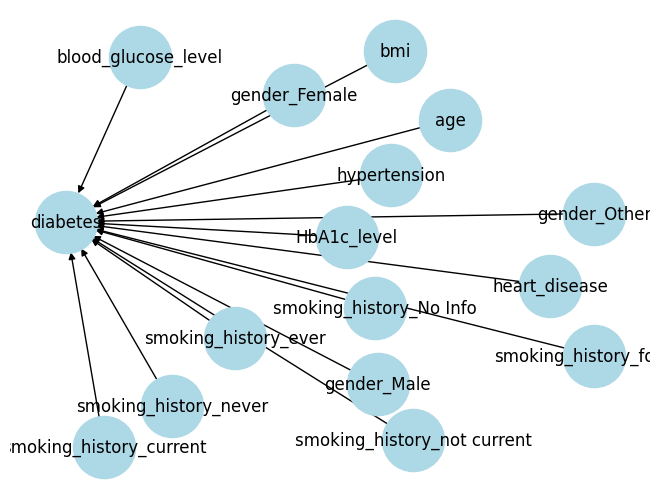

In [112]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for edge in structure:
    G.add_edge(*edge)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
plt.show()


## **Validation and Accuracy**

In [113]:
features_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
52679,28.0,0,0,31.44,8.2,155,1,0,0,0,0,0,0,1,0
9896,80.0,0,0,30.28,6.1,145,0,1,0,0,0,0,0,0,1
42653,29.0,0,0,31.26,4.8,85,1,0,0,1,0,0,0,0,0
5334,9.0,0,0,27.32,5.7,130,1,0,0,1,0,0,0,0,0
68991,52.0,0,0,30.84,6.0,200,1,0,0,0,1,0,0,0,0


In [114]:
predictions = bn.predict(data_test.drop('diabetes', axis=1))

0.9991652933883699
0.9992325174760833
0.9991808099010088
0.9991530942136118
0.9992095545893032
0.9992267693161592
0.9992002546562283
0.9992210564505254
0.9991973014939979
0.9991994268296672
0.9991452159828333
0.9991569218340643
0.9991423394615746
0.9991668784810674
0.9992018868289272
0.9991511217090008
0.999183616192743
0.9992363633196992
0.9992172576952522
0.9991689038846108
0.999177557440353
0.9992005071142468
0.9991686338303306
0.9992716760065624
0.9991828412319439
0.9991869391443432
0.9992261939166623
0.999208491898796
0.9991774635067857
0.9992034661665787
0.999299386528604
0.9991791249593615
0.999223246472487
0.9993832262348099
0.9991604500807327
0.9992999620123995
0.9992303567708264
0.9991433902704816
0.9991863168231035
0.9992005423409572
0.9991642777575444
0.9991784321975451
0.9991561234322857
0.9992707247508272
0.9992360403851271
0.9992199408934308
0.9992319068410417
0.9991639959643863
0.999164565421557
0.9992469674326927
0.9991836103218233
0.9991978240204376
0.9991436661815666

In [115]:
print(predictions)

[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

binary_predictions =  predictions
accuracy = accuracy_score(label_test, predictions)
precision = precision_score(label_test, binary_predictions)
recall = recall_score(label_test, binary_predictions)
f1 = f1_score(label_test, binary_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.66625
Precision: 0.6661031276415892
Recall: 0.45601851851851855
F1 Score: 0.5413947097217451


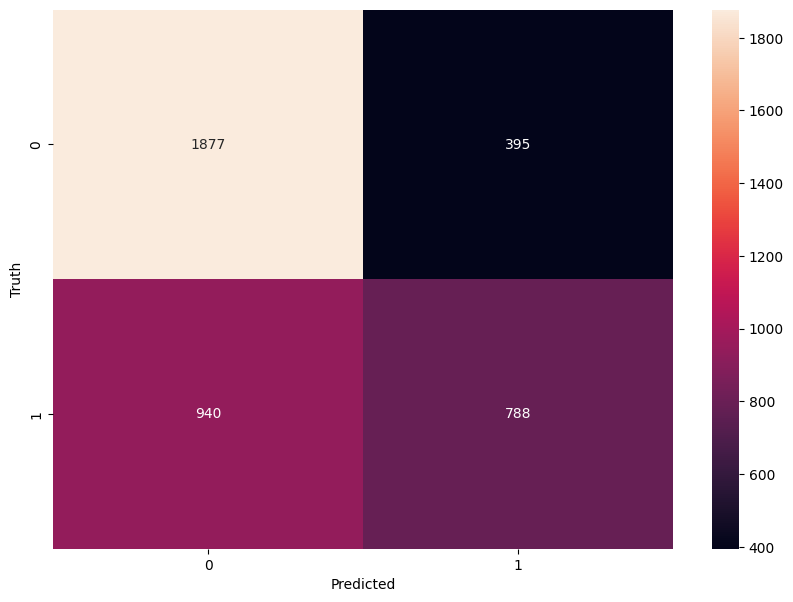

In [117]:

cm = confusion_matrix(label_test, binary_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()